___
# Ciência dos Dados - PROJETO 1

## Marco Moliterno Pena Piacentini


## A renda afeta como as pessoas usam a internet?


___
## Introdução

Em um mundo cada vez mais digitalizado, o acesso à internet é essencial para a inclusão das pessoas na sociedade. É crescente a possibilidade de se comunicar, usufruir serviços públicos, comprar ou vender bens e serviços, receber notícias, acessar conteúdos educacionais, e buscar qualquer tipo de informação pelo computador. A internet encurta distâncias, distribui conhecimento e abre oportunidades, enquanto a falta de conexão aprofunda as desigualdades. Neste estudo exploratório, investiguei a relação entre renda e acesso à internet. Foi feita uma análise de dados com base em pesquisas PNAD 2015 para caracterizar os domicílios brasileiros quanto ao acesso à internet e verificar se a renda de fato afeta o acesso à internet e a maneira com que aqueles que o têm se relacionam com ela.
A hipótese inicial seria de que quanto maior a renda, maior o acesso à internet e maior a variedade de aparelhos usados para acessá-la.

___
## Análise e Resultados

In [276]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

dados = pd.read_csv('DOM2015.csv',sep=',')

In [277]:
print('Como que as pessoas utilizam a internet?')
print(os.getcwd())

Como que as pessoas utilizam a internet?
C:\Users\marco\Desktop\Insper\Ciencia dos Dados\Projeto1


#Primeiro vamos descobrir quantos porcento dos domicílios brasileiros tem acesso a internet.

In [282]:
df = {}
df['ACESSO'] = dados['V02322']
df['MICRO'] = dados['V02323']
df['CELULAR'] = dados['V02324']
df['TABLET'] = dados['V02325']
df['TV']=dados['V02326']
df['OUTROS'] = dados['V02327']
df['RENDA'] = dados['V4622']
#df['RENDAA'] = dados['V4621']
df = pd.DataFrame.from_dict(df)
#df.head()

Tem acesso        57.7
Não tem acesso    42.3
Name: ACESSO, dtype: float64 



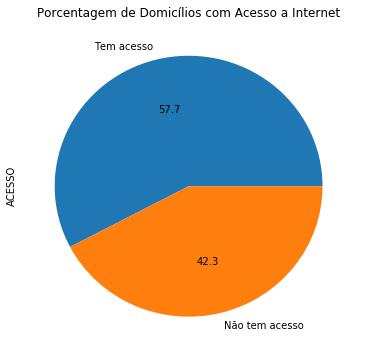

In [283]:
df2 = df.ACESSO#.dropna()
df2 = df2.astype('category')
df2.cat.categories = ('Tem acesso', 'Não tem acesso')
df2 = (df2.value_counts(normalize=True)*100).round(decimals=1)#.reindex(['SIM','NÃO'])



print(df2,'\n')
# Gráfico de Setor
plot = df2.plot(kind='pie',title='Porcentagem de Domicílios com Acesso a Internet',autopct='%.1f',figsize=(6, 6))

#Agora descobriremos como esse acesso é distribuido por renda.

In [274]:
df3 ={}
df3['ACESSO'] = dados['V02322']
df3['RENDA'] = dados['V4622']
df3 = pd.DataFrame.from_dict(df3)
df3.ACESSO = df3.ACESSO.astype('category')
df3.ACESSO.cat.categories = ('Sim', 'Não')
df3.RENDA = df3.RENDA.astype('category')
df3.RENDA.cat.categories = ('0', '1/4','1/2','1','2','3','5','5+','SD')
df3 = df3.dropna()
df3 = df3[df3['RENDA'] != 'SD'].dropna(axis=0)
ct=pd.crosstab(df3.ACESSO,df3.RENDA,margins=True,rownames=['Acesso à Internet'], colnames=['Salários Mínimos']).apply(percConvert, axis=0)
ct

Salários Mínimos,0,1/4,1/2,1,2,3,5,5+,All
Acesso à Internet,,,,,,,,,
Sim,49.0,29.0,44.0,50.0,63.0,76.0,85.0,91.0,58.0
Não,51.0,71.0,56.0,50.0,37.0,24.0,15.0,9.0,42.0
All,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


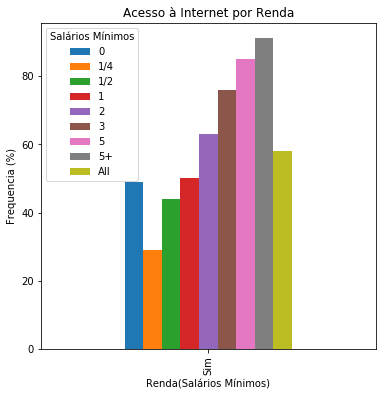

In [275]:
ct = ct[0:1]
plot = ct.plot(kind='bar',title='Acesso à Internet por Renda',figsize=(6, 6))
plt.ylabel('Frequencia (%)')
plt.xlabel('Renda(Salários Mínimos)')

#Como o esperado, o acesso à internet aumenta com a renda, com a excessão dos domicílios com renda 0.

In [252]:

df.ACESSO = df.ACESSO.astype('category')
df.MICRO = df.MICRO.astype('category')
df.CELULAR = df.CELULAR.astype('category')
df.TABLET = df.TABLET.astype('category')
df.TV = df.TV.astype('category')
df.OUTROS = df.OUTROS.astype('category')
df.RENDA = df.RENDA.astype('category')

df.ACESSO.cat.categories = ('Sim', 'Não')
df.MICRO.cat.categories = ('Sim', 'Não')
df.CELULAR.cat.categories = ('Sim', 'Não')
df.TABLET.cat.categories = ('Sim', 'Não')
df.TV.cat.categories = ('Sim', 'Não')
df.OUTROS.cat.categories = ('Sim', 'Não')
df.RENDA.cat.categories = ('0', '1/4','1/2','1','2','3','5','5+','SD')
df = df.dropna()
df.head()

df = df[df['RENDA'] != 'SD'].dropna(axis=0)
#df = df[df['RENDAA'] != 999999999999].dropna(axis=0)

df.ACESSO.value_counts()

Sim    66332
Não        0
Name: ACESSO, dtype: int64

#Agora descobriremos como que a renda afeta o aparelho com que as pessoas usam a Internet entre os domicílios que tem acesso.

In [253]:
ct = df.TV.value_counts()
print(ct)

def percConvert(tab):
  return (tab/float(tab[-1])*100).round(decimals=0)


ct1=pd.crosstab(df.TV,df.RENDA,margins=True,rownames=['Acesso por TV'], colnames=['Salários Mínimos']).apply(percConvert, axis=0)
ct1


Não    61611
Sim     4721
Name: TV, dtype: int64


Salários Mínimos,0,1/4,1/2,1,2,3,5,5+,All
Acesso por TV,,,,,,,,,
Sim,5.0,1.0,2.0,3.0,6.0,10.0,16.0,25.0,7.0
Não,95.0,99.0,98.0,97.0,94.0,90.0,84.0,75.0,93.0
All,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


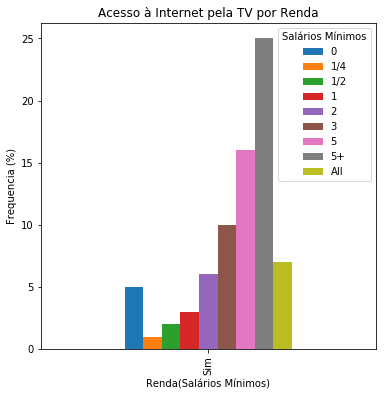

In [254]:
ct1 = ct1.iloc[0:1]
plot = ct1.plot(kind='bar',title='Acesso à Internet pela TV por Renda',figsize=(6, 6))
plt.ylabel('Frequencia (%)')

plt.xlabel('Renda(Salários Mínimos)')

#O uso da TV para acessar à Internet aumenta muito com a renda.

In [255]:
ct3=pd.crosstab(df.CELULAR,df.RENDA,margins=True,rownames=['Acesso por Celular'], colnames=['Salários Mínimos']).apply(percConvert, axis=0)
ct3


Salários Mínimos,0,1/4,1/2,1,2,3,5,5+,All
Acesso por Celular,,,,,,,,,
Sim,93.0,94.0,94.0,93.0,92.0,92.0,92.0,94.0,93.0
Não,7.0,6.0,6.0,7.0,8.0,8.0,8.0,6.0,7.0
All,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


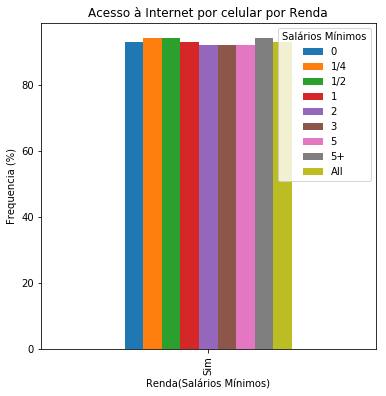

In [256]:
ct3 = ct3.iloc[0:1]
plot = ct3.plot(kind='bar',title='Acesso à Internet por celular por Renda',figsize=(6, 6))
plt.ylabel('Frequencia (%)')
plt.xlabel('Renda(Salários Mínimos)')

#A renda praticamente não afeta o uso de Internet pelo celular.

In [257]:
ct2=pd.crosstab(df.MICRO,df.RENDA,margins=True,rownames=['Acesso por PC'], colnames=['Salários Mínimos']).apply(percConvert, axis=0)
ct2

Salários Mínimos,0,1/4,1/2,1,2,3,5,5+,All
Acesso por PC,,,,,,,,,
Sim,62.0,30.0,42.0,57.0,72.0,84.0,90.0,94.0,67.0
Não,38.0,70.0,58.0,43.0,28.0,16.0,10.0,6.0,33.0
All,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


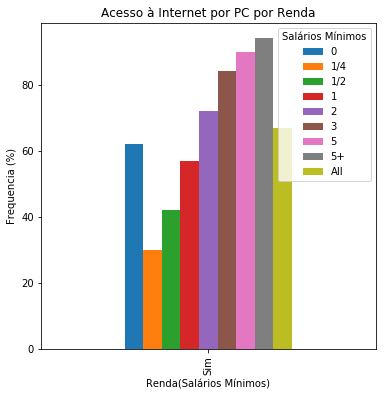

In [258]:
ct2 = ct2.iloc[0:1]
plot = ct2.plot(kind='bar',title='Acesso à Internet por PC por Renda',figsize=(6, 6))
plt.ylabel('Frequencia (%)')
plt.xlabel('Renda(Salários Mínimos)')

#O uso de computadores para acessar à Internet geralmente aumenta com a renda.

In [259]:
ct4=pd.crosstab(df.TABLET,df.RENDA,margins=True,rownames=['Acesso por Tablet'], colnames=['Salários Mínimos']).apply(percConvert, axis=0)
ct4

Salários Mínimos,0,1/4,1/2,1,2,3,5,5+,All
Acesso por Tablet,,,,,,,,,
Sim,16.0,8.0,10.0,14.0,18.0,26.0,34.0,47.0,20.0
Não,84.0,92.0,90.0,86.0,82.0,74.0,66.0,53.0,80.0
All,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


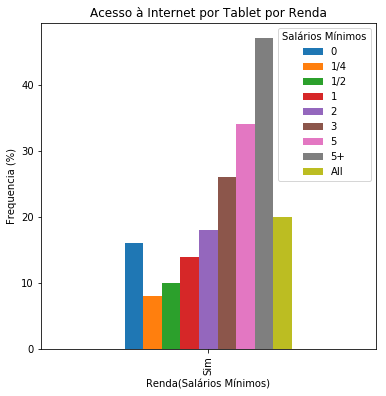

In [260]:
ct4 = ct4.iloc[0:1]
plot = ct4.plot(kind='bar',title='Acesso à Internet por Tablet por Renda',figsize=(6, 6))
plt.ylabel('Frequencia (%)')
plt.xlabel('Renda(Salários Mínimos)')

#O uso da Tablets para acessar a Internet aumenta com renda, com a excessão da renda 0.

In [261]:
ct5=pd.crosstab(df.OUTROS,df.RENDA,margins=True,rownames=['Acesso por Outros'], colnames=['Salários Mínimos']).apply(percConvert, axis=0)
ct5

Salários Mínimos,0,1/4,1/2,1,2,3,5,5+,All
Acesso por Outros,,,,,,,,,
Sim,2.0,0.0,0.0,0.0,1.0,1.0,2.0,3.0,1.0
Não,98.0,100.0,100.0,100.0,99.0,99.0,98.0,97.0,99.0
All,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


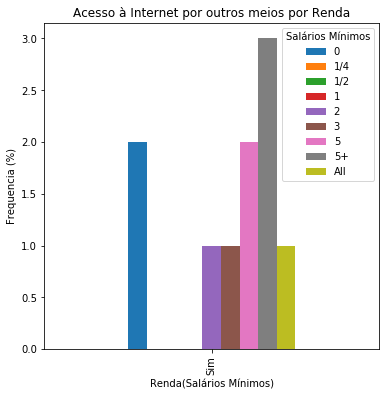

In [262]:
ct5 = ct5.iloc[0:1]
plot = ct5.plot(kind='bar',title='Acesso à Internet por outros meios por Renda',figsize=(6, 6))
plt.ylabel('Frequencia (%)')
plt.xlabel('Renda(Salários Mínimos)')

#Outros aparelhos são muito pouco usados para acessar à internet.

In [264]:
fd = {'RENDA':['0', '1/4','1/2','1','2','3','5','5+'],'MICRO':[],'TV':[],'CELULAR':[],'TABLET':[],'OUTROS':[]}
coi = ['MICRO','CELULAR','TV','TABLET','OUTROS']
for a in range(len(fd['RENDA'])):
    for b in coi:
        nd = df.loc[df['RENDA'] == fd['RENDA'][a]]
        fd[b].append(len(nd.loc[df[b] == 'Sim']))
#del fd['RENDA']
#print(fd)

{'RENDA': ['0', '1/4', '1/2', '1', '2', '3', '5', '5+'], 'MICRO': [206, 700, 3301, 10148, 14391, 6072, 5006, 4921], 'TV': [18, 31, 122, 504, 1136, 719, 877, 1314], 'CELULAR': [307, 2189, 7435, 16668, 18374, 6630, 5104, 4914], 'TABLET': [54, 188, 829, 2561, 3604, 1844, 1873, 2464], 'OUTROS': [7, 2, 15, 84, 148, 89, 119, 138]}


#Agora veremos o uso de dispositivos de acesso à Internet em números absolutos.

In [265]:
dff = pd.DataFrame.from_dict(fd).set_index('RENDA')
dff

,CELULAR,MICRO,OUTROS,TABLET,TV
RENDA,,,,,
0,307,206,7,54,18
1/4,2189,700,2,188,31
1/2,7435,3301,15,829,122
1,16668,10148,84,2561,504
2,18374,14391,148,3604,1136
3,6630,6072,89,1844,719
5,5104,5006,119,1873,877
5+,4914,4921,138,2464,1314


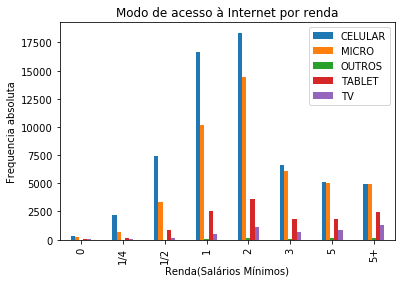

In [266]:
ut3 = dff.plot(kind='bar', title="Modo de acesso à Internet por renda")
plt.ylabel('Frequencia absoluta')
plt.xlabel('Renda(Salários Mínimos)')

#A maioria dos domicílios com acesso à internet está na facha de renda de um ou dois salários mínimos e uma parcela muito pequena dos domicílios tem renda de 0 salários mínimos.

###### ___
## Conclusão 

Descobrimos que, em 2015, o Brasil tinha 57,7% dos domicílios com acesso à internet e que o acesso à internet cresce em termos percentuais quanto maior a renda.  A maior parte do acesso à internet se dá, em todas as faixas de renda, pelo celular, não havendo diferenças significativas entre domicilios mais ricos e mais pobres. Já o acesso por outros meios, TV, computador e tablet, cresce, em termos percentuais, com o crescimento da renda, sendo tv o meio em que o impacto da renda é maior. Podemos concluir que a hipótese foi confirmada, com domicílios de maior renda tendo percentualmente mais acesso à internet e mais meios de acesso à internet do que os domicílios de menor renda.  